# Demo Notebook Project 1 Bio-Inspired AI

### Imports

In [1]:
import numpy as np
import pandas as pd
from LinReg import LinReg
from plots import plot_fitness, plot_sine, plot_entropy

from genetic_algorithm import SGA_Sine, SGA_LinReg

## Task 1: Individuals, values and fitness values through generations

### Run algorithm

In [3]:
size = 100
bits = 15
p_crossover = 0.6
p_mut = 0.01

sga_sine = SGA_Sine(size=size, bits=bits)

population, mean_fitness, best_fitness, entropy = sga_sine.run(
    generations=10,
    maximize=True,
    p_crossover=p_crossover,
    p_mut=p_mut,
    # crowding=None,
    feasible_region=(0, 128),
)

ValueError: too many values to unpack (expected 3)

### Plot Fitness

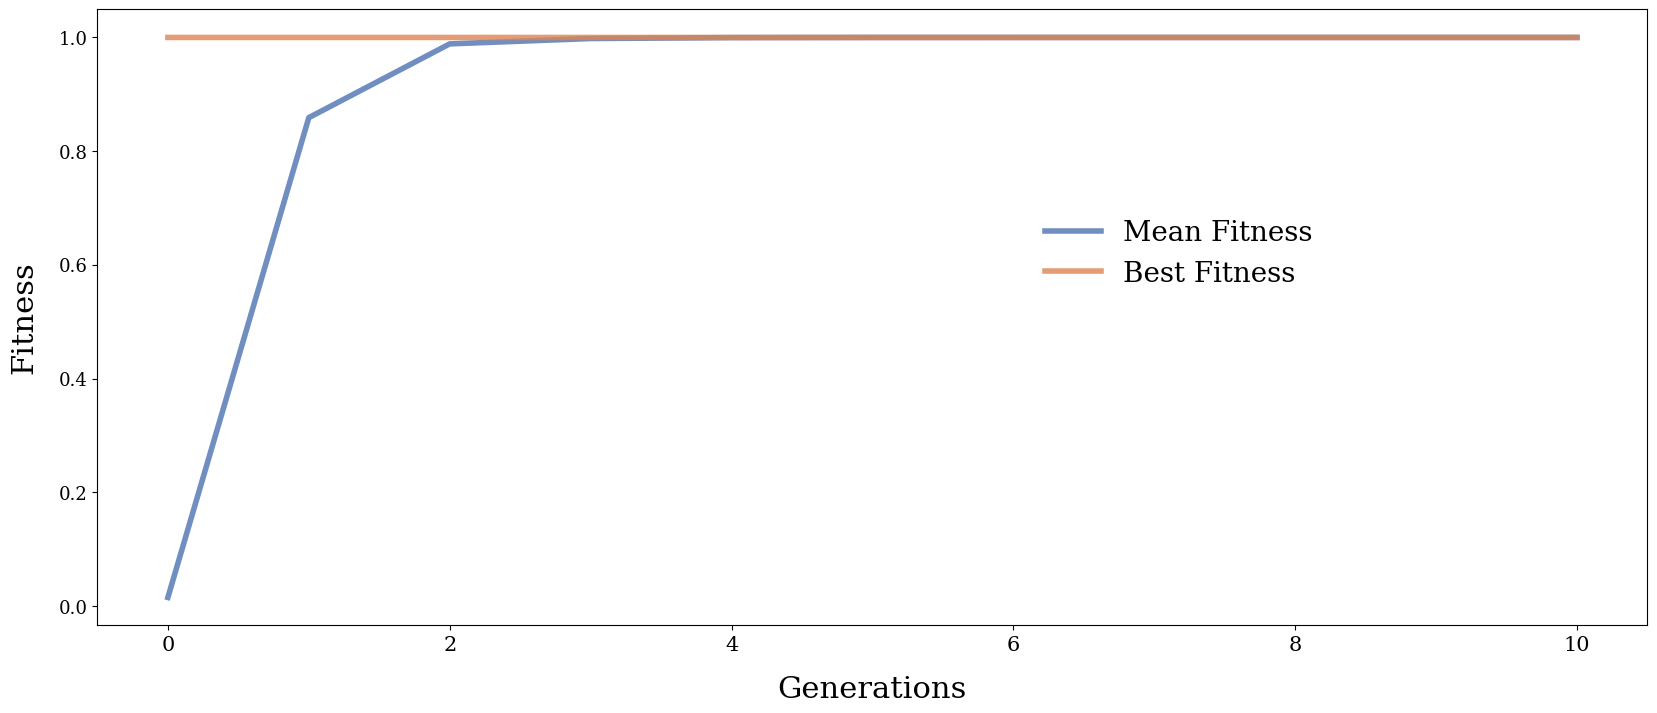

In [ ]:
plot_fitness(mean_fitness, best_fitness)


### Plot individuals and sine wave for each generation

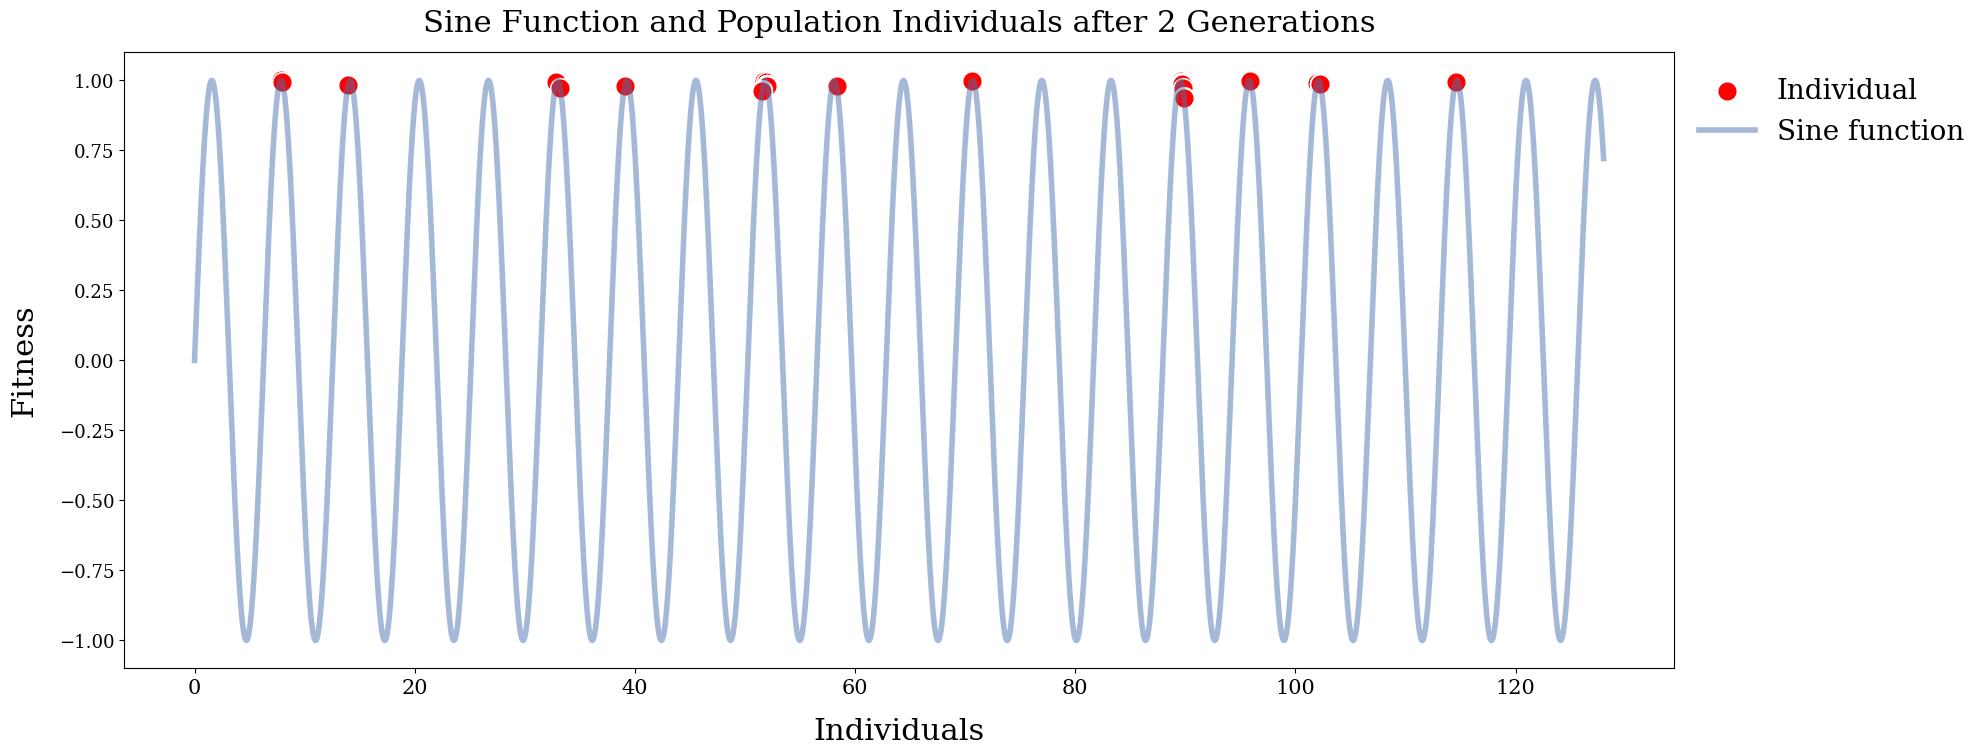

In [ ]:
x_pop = list(map(lambda x: np.asarray(sga_sine.decode(x), dtype=float), population))

plot_sine(x_pop, generation=2)

## Task 2: Feature selection for Linear Regression

### Init

In [ ]:

data = pd.read_csv('dataset.txt', header=None).values
X, y = data[:, :-1], data[:, -1]
reg = LinReg(X=X, y=y)
size = 50
p_crossover = 0.3
p_mut = 0.01

bits = X.shape[1]
sga_linreg = SGA_LinReg(size=size, bits=bits, linreg=reg)

### Run Simple Genetic Algorithm

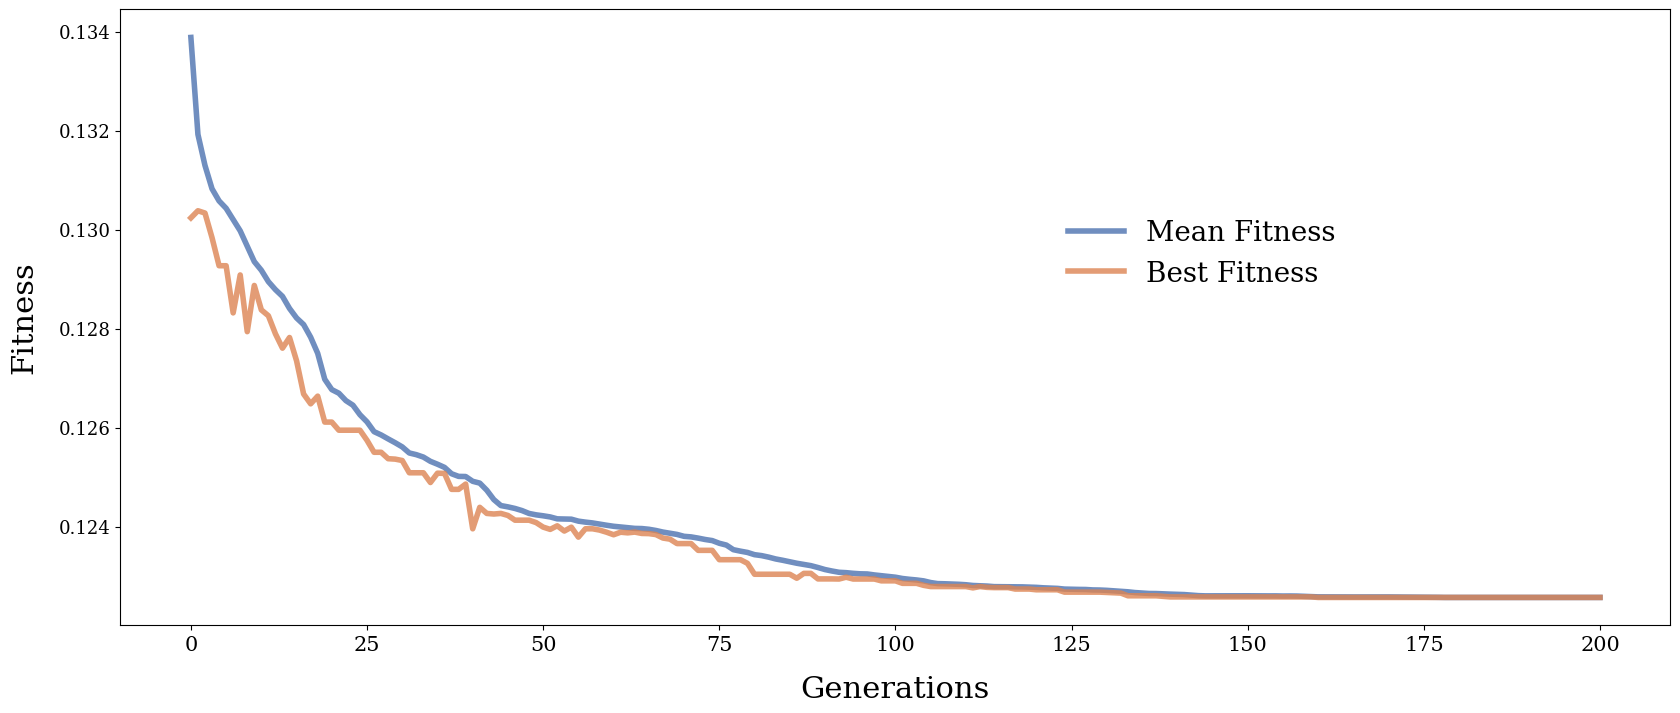

In [ ]:
simple_population, simple_mean_fitness, simple_best_fitness, simple_entropy = sga_linreg.run(generations=500, maximize=False, p_crossover=p_crossover, p_mut=p_mut)
plot_fitness(simple_mean_fitness, simple_best_fitness)

### Report results

In [ ]:
fitness = np.array(list(map(lambda x: reg.get_fitness(x), simple_population[-1])))
best_features = simple_population[-1][np.argmin(fitness)]
mean_features = np.mean(simple_population[-1])

print('Fitness of best features: ', simple_best_fitness[-1]) 
print('Fitness of mean features: ', simple_mean_fitness[-1])
print('Fitness of all features: ', reg.get_fitness(np.ones(bits)))

### Run Genetic Algorithm with Crowding Penalizing Similarity

In [ ]:

sim_crowding_population, sim_crowding_mean_fitness, sim_crowding_best_fitness, sim_crowding_entropy = sga_linreg.run(
    generations=500, 
    maximize=False, 
    p_crossover=p_crossover, 
    p_mut=p_mut, 
    crowding='similarity_penalty'
)

plot_fitness(sim_crowding_mean_fitness, sim_crowding_best_fitness)

### Report results

In [ ]:
fitness = np.array(list(map(lambda x: reg.get_fitness(x), sim_crowding_population[-1])))

print('Fitness of best features: ', sim_crowding_best_fitness[-1]) 
print('Fitness of mean features: ', sim_crowding_mean_fitness[-1])
print('Fitness of all features: ', reg.get_fitness(np.ones(bits)))

NameError: name 'sim_crowding_population' is not defined

### Run Genetic Algorithm with Tournament Crowding 

c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

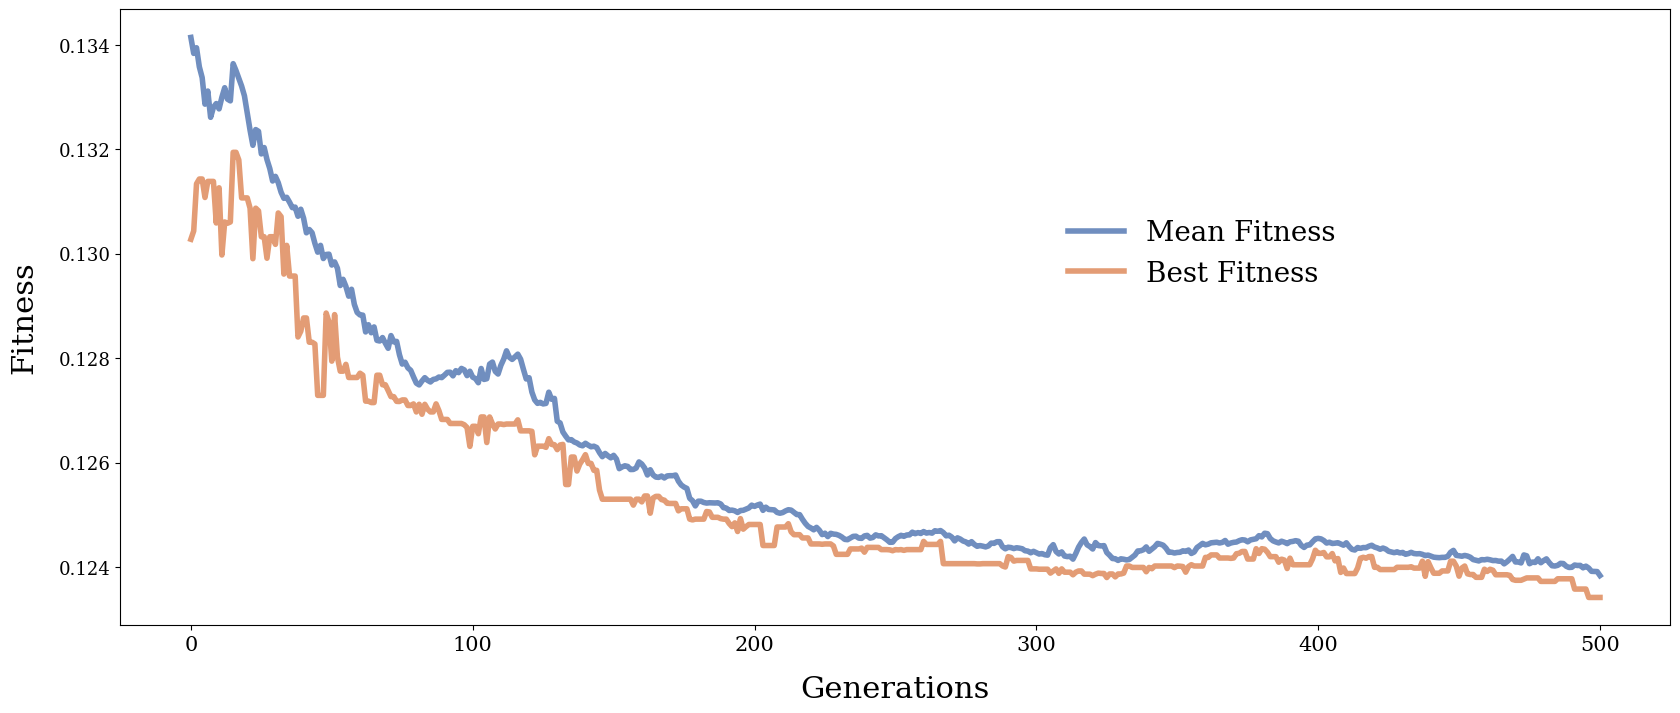

In [ ]:

tournament_population, tournament_mean_fitness, tournament_best_fitness, tournament_entropy = sga_linreg.run(
    generations=500, 
    maximize=False, 
    p_crossover=p_crossover, 
    p_mut=p_mut, 
    crowding='tournament'
)
plot_fitness(tournament_mean_fitness, tournament_best_fitness)

### Report results

In [ ]:
print('Fitness of best features: ', tournament_best_fitness[-1]) 
print('Fitness of mean features: ', tournament_mean_fitness[-1])
print('Fitness of all features: ', reg.get_fitness(np.ones(bits)))

Fitness of best features:  0.12341990016417372


KeyError: -1

### Entropy comparison with and without crowding

c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

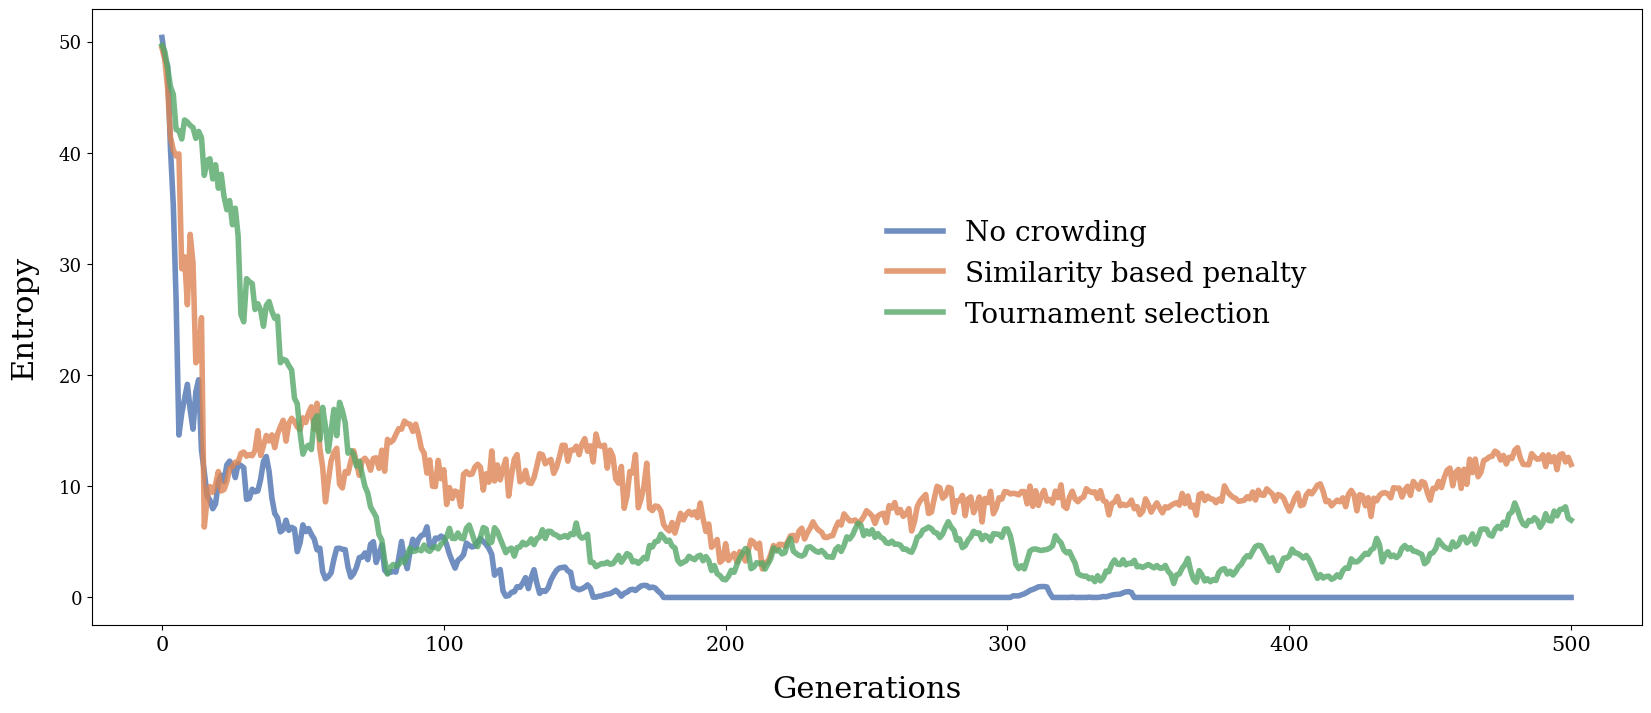

In [ ]:

entropies = {"No crowding": simple_entropy,
             "Similarity based penalty": sim_crowding_entropy,
             "Tournament selection": tournament_entropy
             }


plot_entropy(entropies)


c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

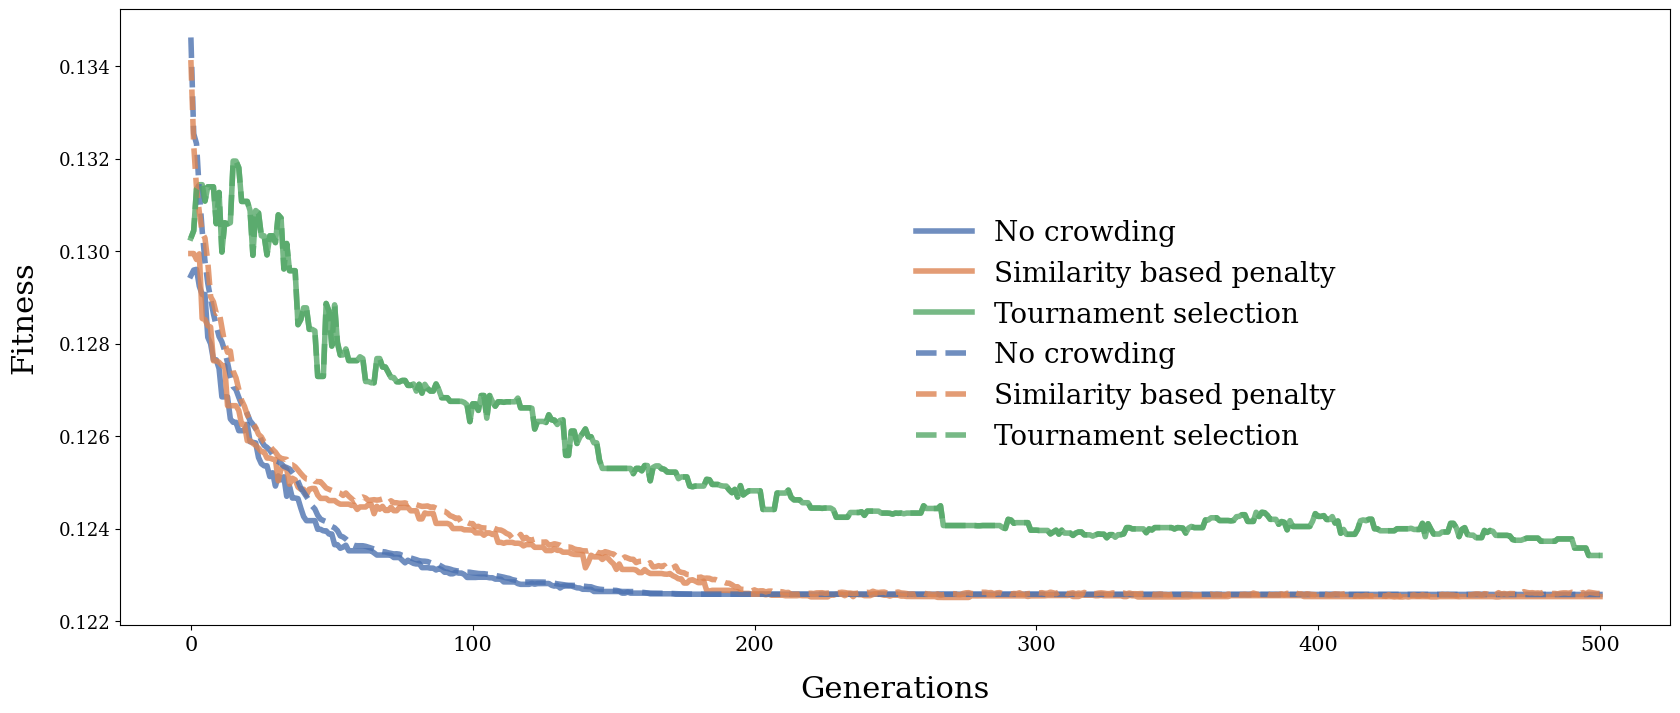

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plots import compare_fitness
best_fitness = {"No crowding": simple_best_fitness,
                "Similarity based penalty": sim_crowding_best_fitness,
                "Tournament selection": tournament_best_fitness
                }

compare_fitness(best_fitness, mean_fitness, legend_title='Best Fitness')


### Hyperparameter Tuning (SKIP)

In [ ]:
from genetic_algorithm import SGA_LinReg
import pandas as pd
from LinReg import LinReg

data = pd.read_csv('dataset.txt', header=None).values
X, y = data[:, :-1], data[:, -1]
reg = LinReg(X=X, y=y)

size = 50
bits = X.shape[1]
from time import time

for size in [10, 50, 100]:
    for p_crossover in [0.1, 0.3, 0.6]:
        for p_mut in [0.01, 0.05, 0.1]:
            sga_linreg = SGA_LinReg(size=size, bits=bits, linreg=reg)
            t = time()
            population, mean_fitness, best_fitness = sga_linreg.run(generations=200, maximize=False, p_crossover=p_crossover, p_mut=p_mut)
            print(f'Elapsed time: {time() - t:.2f} seconds')
            print(f'[size={size}, p_crossover={p_crossover}, p_mut={p_mut}, best_fitness={best_fitness[-1]:.4f}, mean_fitness={mean_fitness[-1]:.4f}')
